In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential
from keras import layers
from keras.utils import np_utils
from tensorflow import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pinsoro = pd.read_csv('combine_upgrade.csv', low_memory = False)

In [3]:
qamqor = pd.read_csv('qamqor_updated.csv')

# Qamqor without transfer learning

In [19]:
#Features and labels for qamqor
X_q = np.array(qamqor[qamqor.columns[0:176]])
y_q = np.array(qamqor['engagement_bin'])

In [20]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xq_train, Xq_rem, yq_train, yq_rem = train_test_split(X_q, y_q, train_size=0.8, random_state=123, stratify=y_q)
Xq_valid, Xq_test, yq_valid, yq_test = train_test_split(Xq_rem,yq_rem, test_size=0.5, random_state=123, stratify=yq_rem)

In [6]:
#Sets' shapes for qamqor
print(Xq_train.shape), print(yq_train.shape)
print(Xq_valid.shape), print(yq_valid.shape)
print(Xq_test.shape), print(yq_test.shape)

(77680, 176)
(77680,)
(9710, 176)
(9710,)
(9711, 176)
(9711,)


(None, None)

In [72]:
#Neural network model for qamqor
model_qamqor = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qamqor.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [73]:
#training
history_q = model_qamqor.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 5.0944 - accuracy: 0.6973 - val_loss: 0.5907 - val_accuracy: 0.7309
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.7283 - val_loss: 0.5780 - val_accuracy: 0.7313
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7306 - val_loss: 0.6276 - val_accuracy: 0.7313
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7314 - val_loss: 0.5802 - val_accuracy: 0.7312
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7320 - val_loss: 0.5749 - val_accuracy: 0.7318
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7322 - val_loss: 0.5694 - val_accuracy: 0.7316
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7326 - val_loss: 0.5668 - val_accuracy: 0.7326
Epoch 8/15
78/78 [==

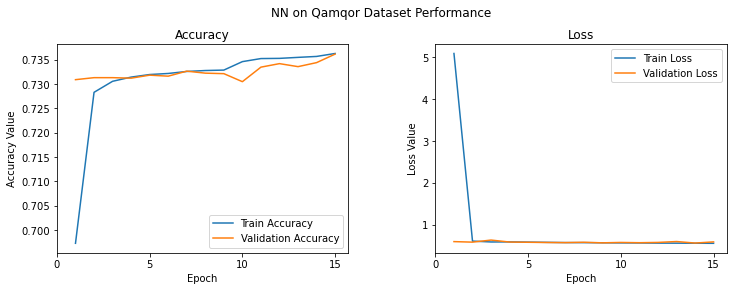

In [74]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_q.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_q.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_q.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_q.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [75]:
scores_q = model_qamqor.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 550us/step - loss: 0.5863 - accuracy: 0.7362


In [76]:
pred_yq = np.round(model_qamqor.predict(Xq_test))

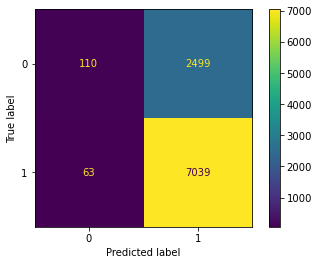

In [77]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq))
disp.plot()

# Model for Pinsoro

In [21]:
#Features and labels for pinsoro
X_p = np.array(pinsoro[pinsoro.columns[0:176]])
y_p = pinsoro['purple_child_social_engagement']
#one hot encoding
y_p = np_utils.to_categorical(y_p)

In [22]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xp_train, Xp_rem, yp_train, yp_rem = train_test_split(X_p, y_p, train_size=0.8, random_state=123, stratify=y_p)
Xp_valid, Xp_test, yp_valid, yp_test = train_test_split(Xp_rem, yp_rem, test_size=0.5, random_state=123, stratify=yp_rem)

In [15]:
#Sets' shapes for pinsoro
print(Xp_train.shape), print(yp_train.shape)
print(Xp_valid.shape), print(yp_valid.shape)
print(Xp_test.shape), print(yp_test.shape)

(706207, 176)
(706207, 5)
(88276, 176)
(88276, 5)
(88276, 176)
(88276, 5)


(None, None)

In [78]:
#Neural network model for pinsoro
model_pinsoro = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
    ])
model_pinsoro.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [79]:
#training
history_p = model_pinsoro.fit(Xp_train, yp_train, validation_data=(Xp_valid, yp_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
71/71 [==============================] - 2s 28ms/step - loss: 1.2422 - accuracy: 0.4209 - val_loss: 1.2911 - val_accuracy: 0.3679
Epoch 2/50
71/71 [==============================] - 2s 25ms/step - loss: 1.1932 - accuracy: 0.4541 - val_loss: 1.1958 - val_accuracy: 0.4542
Epoch 3/50
71/71 [==============================] - 2s 25ms/step - loss: 1.1629 - accuracy: 0.4801 - val_loss: 1.1505 - val_accuracy: 0.5006
Epoch 4/50
71/71 [==============================] - 2s 28ms/step - loss: 1.1431 - accuracy: 0.4939 - val_loss: 1.1283 - val_accuracy: 0.5005
Epoch 5/50
71/71 [==============================] - 2s 26ms/step - loss: 1.1264 - accuracy: 0.5053 - val_loss: 1.1028 - val_accuracy: 0.5292
Epoch 6/50
71/71 [==============================] - 2s 26ms/step - loss: 1.1157 - accuracy: 0.5126 - val_loss: 1.1235 - val_accuracy: 0.4964
Epoch 7/50
71/71 [==============================] - 2s 26ms/step - loss: 1.1010 - accuracy: 0.5237 - val_loss: 1.0900 - val_accuracy: 0.5305
Epoch 8/50
71

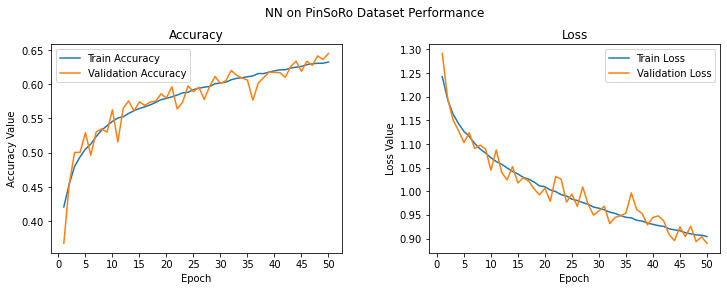

In [80]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [81]:
#testing
scores_p = model_pinsoro.evaluate(Xp_test, yp_test, verbose = 1)

2759/2759 [==============================] - 1s 509us/step - loss: 0.8874 - accuracy: 0.6462


In [82]:
pred_yp = np.argmax(model_pinsoro.predict(Xp_test), axis = 1)

In [83]:
true_yp = np.argmax(yp_test, axis = 1)

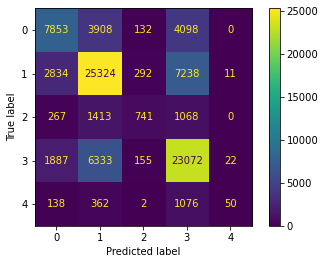

In [84]:
# Confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix(true_yp, pred_yp))
disp2.plot()

# Transfer learning for Qamqor


In [85]:
model_temp = model_pinsoro

In [86]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp.layers[:-1]:
    layer.trainable = False


In [87]:
model_tl = Sequential(
    [
    model_temp,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)

In [88]:
model_tl.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [89]:
#Training for qamqor with transfer learning - method 2
history_tl = model_tl.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 3ms/step - loss: 0.6327 - accuracy: 0.6047 - val_loss: 0.6163 - val_accuracy: 0.6232
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6802 - val_loss: 0.6005 - val_accuracy: 0.7313
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7313 - val_loss: 0.5903 - val_accuracy: 0.7313
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7313 - val_loss: 0.5855 - val_accuracy: 0.7313
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7313 - val_loss: 0.5835 - val_accuracy: 0.7313
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7313 - val_loss: 0.5823 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7313 - val_loss: 0.5816 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

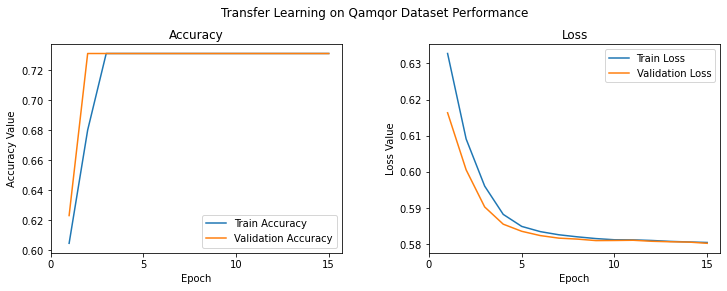

In [90]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [91]:
#testing
scores_tl = model_tl.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 569us/step - loss: 0.5803 - accuracy: 0.7313


In [92]:
pred_ytl_q = np.round(model_tl.predict(Xq_test))

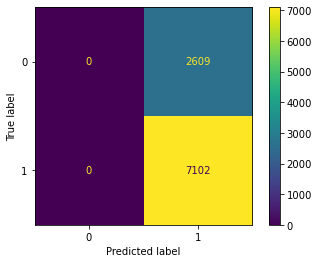

In [93]:
disp3 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_ytl_q))
disp3.plot()

# Model for Pinsoro if binary classification is used


In [4]:
#Drop labels that are zero (missing)
pinsoro2 = pinsoro[pinsoro['purple_child_social_engagement'] != 0]

In [5]:
#Replace 1 and 2 with 0; 3, 4, and 5 with 1
pinsoro2['purple_child_social_engagement'].replace(to_replace = 1, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 2, value=0, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 3, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 4, value=1, inplace= True)
pinsoro2['purple_child_social_engagement'].replace(to_replace = 5, value=1, inplace= True)

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [6]:
#Features and labels for pinsoro2
X_p2 = np.array(pinsoro2[pinsoro2.columns[0:176]])
y_p2 = pinsoro2['purple_child_social_engagement']


In [7]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro2
Xp2_train, Xp2_rem, yp2_train, yp2_rem = train_test_split(X_p2, y_p2, train_size=0.8, random_state=123, stratify=y_p2)
Xp2_valid, Xp2_test, yp2_valid, yp2_test = train_test_split(Xp2_rem,yp2_rem, test_size=0.5, random_state=123, stratify=yp2_rem)

In [8]:
#Sets' shapes for pinsoro2
print(Xp2_train.shape), print(yp2_train.shape)
print(Xp2_valid.shape), print(yp2_valid.shape)
print(Xp2_test.shape), print(yp2_test.shape)

(578276, 176)
(578276,)
(72284, 176)
(72284,)
(72285, 176)
(72285,)


(None, None)

In [9]:
#Neural network model
model_pinsoro2 = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_pinsoro2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [10]:
#training
history_p2 = model_pinsoro2.fit(Xp2_train, yp2_train, validation_data=(Xp2_valid, yp2_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
58/58 [==============================] - 2s 25ms/step - loss: 0.6679 - accuracy: 0.5809 - val_loss: 0.6414 - val_accuracy: 0.6188
Epoch 2/50
58/58 [==============================] - 1s 25ms/step - loss: 0.6396 - accuracy: 0.6176 - val_loss: 0.6260 - val_accuracy: 0.6473
Epoch 3/50
58/58 [==============================] - 2s 27ms/step - loss: 0.6237 - accuracy: 0.6379 - val_loss: 0.6234 - val_accuracy: 0.6423
Epoch 4/50
58/58 [==============================] - 2s 27ms/step - loss: 0.6128 - accuracy: 0.6489 - val_loss: 0.5940 - val_accuracy: 0.6745
Epoch 5/50
58/58 [==============================] - 1s 26ms/step - loss: 0.6026 - accuracy: 0.6618 - val_loss: 0.5886 - val_accuracy: 0.6790
Epoch 6/50
58/58 [==============================] - 1s 24ms/step - loss: 0.5961 - accuracy: 0.6704 - val_loss: 0.5916 - val_accuracy: 0.6808
Epoch 7/50
58/58 [==============================] - 1s 23ms/step - loss: 0.5889 - accuracy: 0.6777 - val_loss: 0.5695 - val_accuracy: 0.6961
Epoch 8/50
58

In [11]:
#testing
scores_p2 = model_pinsoro2.evaluate(Xp2_test, yp2_test, verbose = 1)

2259/2259 [==============================] - 1s 538us/step - loss: 0.4947 - accuracy: 0.7512


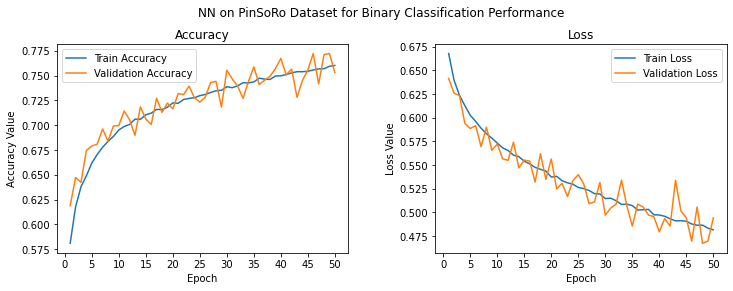

In [12]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN on PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_p2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_p2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_p2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_p2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
pred_yp2 = np.round(model_pinsoro2.predict(Xp2_test))

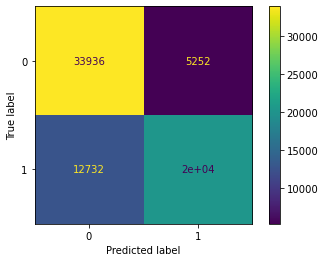

In [14]:
disp4 = ConfusionMatrixDisplay(confusion_matrix(yp2_test, pred_yp2))
disp4.plot()

# Transfer learning with binary classification for Pinsoro

In [15]:
model_tl_bin = model_pinsoro2

In [16]:
#Freeze all layers till the last one so that they are not trained
for layer in model_tl_bin.layers[:-1]:
    layer.trainable = False


In [17]:
model_tl_bin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [23]:
#Training for qamqor with transfer learning
history_tl_bin = model_tl_bin.fit(Xq_train, yq_train, validation_data=(Xq_valid, yq_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 0s 3ms/step - loss: 962.9853 - accuracy: 0.4514 - val_loss: 821.2524 - val_accuracy: 0.4931
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 753.4984 - accuracy: 0.5203 - val_loss: 662.3896 - val_accuracy: 0.5521
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 616.4358 - accuracy: 0.5598 - val_loss: 539.6683 - val_accuracy: 0.5738
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 498.7107 - accuracy: 0.5793 - val_loss: 431.9260 - val_accuracy: 0.5913
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 394.8730 - accuracy: 0.5975 - val_loss: 337.5081 - val_accuracy: 0.6124
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 304.7588 - accuracy: 0.6165 - val_loss: 258.3687 - val_accuracy: 0.6342
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 232.4192 - accuracy: 0.6403 - val_loss: 200.6620 - val_accuracy:

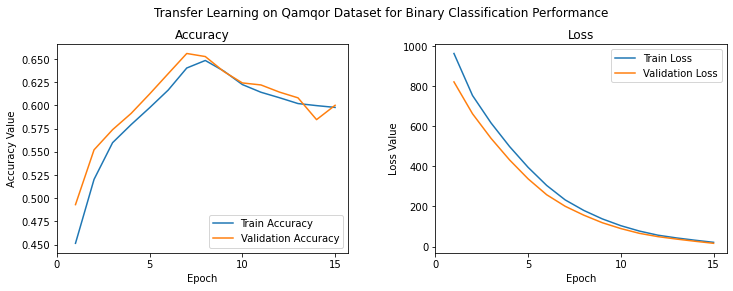

In [24]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning on Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_bin.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_bin.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_bin.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_bin.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
#testing qamqor
scores_tl_bin = model_tl_bin.evaluate(Xq_test, yq_test, verbose = 1)

304/304 [==============================] - 0s 546us/step - loss: 16.7840 - accuracy: 0.5883


In [26]:
pred_yq_tl_bin = np.round(model_pinsoro2.predict(Xq_test))

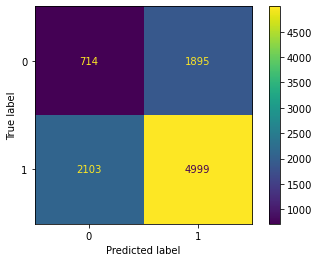

In [27]:
disp5 = ConfusionMatrixDisplay(confusion_matrix(yq_test, pred_yq_tl_bin))
disp5.plot()

# Qamqor - only keypoints for face

In [28]:
#Features and labels for qamqor
X_qf = np.array(qamqor[qamqor.columns[0:139]])
y_qf = np.array(qamqor['engagement_bin'])

In [29]:
#Split to train, validation, and test sets in ratio 80:10:10 for qamqor
Xqf_train, Xqf_rem, yqf_train, yqf_rem = train_test_split(X_qf, y_qf, train_size=0.8, random_state=123, stratify=y_qf)
Xqf_valid, Xqf_test, yqf_valid, yqf_test = train_test_split(Xqf_rem,yqf_rem, test_size=0.5, random_state=123, stratify=yqf_rem)

In [30]:
#Neural network model for qamqor
model_qf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_qf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [31]:
#training
history_qf = model_qf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 4ms/step - loss: 4.2913 - accuracy: 0.6148 - val_loss: 1.2040 - val_accuracy: 0.3696
Epoch 2/15
78/78 [==============================] - 0s 3ms/step - loss: 0.8636 - accuracy: 0.6971 - val_loss: 0.6789 - val_accuracy: 0.7309
Epoch 3/15
78/78 [==============================] - 0s 3ms/step - loss: 0.7264 - accuracy: 0.7269 - val_loss: 0.6661 - val_accuracy: 0.7307
Epoch 4/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.7313 - val_loss: 0.6394 - val_accuracy: 0.7301
Epoch 5/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.7294 - val_loss: 0.6391 - val_accuracy: 0.7313
Epoch 6/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.7313 - val_loss: 0.6278 - val_accuracy: 0.7313
Epoch 7/15
78/78 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7313 - val_loss: 0.6176 - val_accuracy: 0.7313
Epoch 8/15
78/78 [==

In [32]:
scores_qf = model_qf.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 566us/step - loss: 0.5820 - accuracy: 0.7313


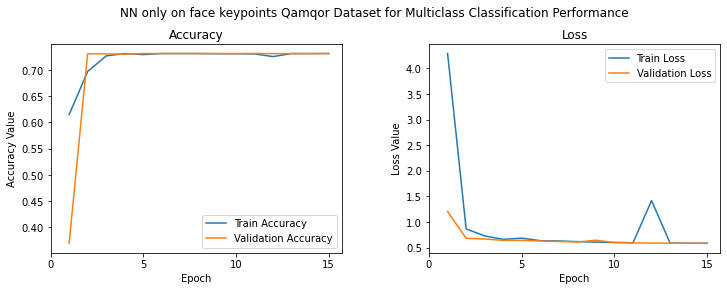

In [33]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints Qamqor Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_qf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_qf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_qf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_qf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [34]:
pred_yqf = np.round(model_qf.predict(Xqf_test))

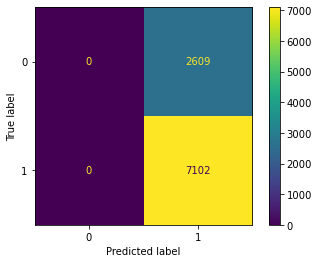

In [35]:
# Confusion matrix
disp6 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_yqf))
disp6.plot()

# Model for Pinsoro - face only
 

In [36]:
#Features and labels for pinsoro
X_pf = np.array(pinsoro[pinsoro.columns[0:139]])
y_pf = pinsoro['purple_child_social_engagement']
#one hot encoding
y_pf = np_utils.to_categorical(y_pf)

In [37]:
#Split to train, validation, and test sets in ratio 80:10:10 for pinsoro
Xpf_train, Xpf_rem, ypf_train, ypf_rem = train_test_split(X_pf, y_pf, train_size=0.8, random_state=123, stratify=y_pf)
Xpf_valid, Xpf_test, ypf_valid, ypf_test = train_test_split(Xpf_rem, ypf_rem, test_size=0.5, random_state=123, stratify=ypf_rem)

In [38]:
#Neural network model for pinsoro
model_pf = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
    ])
model_pf.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [39]:
#training
history_pf = model_pf.fit(Xpf_train, ypf_train, validation_data=(Xpf_valid, ypf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
71/71 [==============================] - 2s 28ms/step - loss: 1.2730 - accuracy: 0.4239 - val_loss: 1.2642 - val_accuracy: 0.4204
Epoch 2/50
71/71 [==============================] - 2s 28ms/step - loss: 1.2164 - accuracy: 0.4475 - val_loss: 1.2146 - val_accuracy: 0.4579
Epoch 3/50
71/71 [==============================] - 2s 25ms/step - loss: 1.2035 - accuracy: 0.4522 - val_loss: 1.1930 - val_accuracy: 0.4670
Epoch 4/50
71/71 [==============================] - 2s 24ms/step - loss: 1.1915 - accuracy: 0.4645 - val_loss: 1.1883 - val_accuracy: 0.4638
Epoch 5/50
71/71 [==============================] - 2s 24ms/step - loss: 1.1834 - accuracy: 0.4720 - val_loss: 1.1837 - val_accuracy: 0.4740
Epoch 6/50
71/71 [==============================] - 2s 25ms/step - loss: 1.1759 - accuracy: 0.4776 - val_loss: 1.1717 - val_accuracy: 0.4817
Epoch 7/50
71/71 [==============================] - 2s 26ms/step - loss: 1.1716 - accuracy: 0.4782 - val_loss: 1.1601 - val_accuracy: 0.4891
Epoch 8/50
71

In [40]:
#testing
scores_pf = model_pf.evaluate(Xpf_test, ypf_test, verbose = 1)

2759/2759 [==============================] - 1s 506us/step - loss: 1.0490 - accuracy: 0.5481


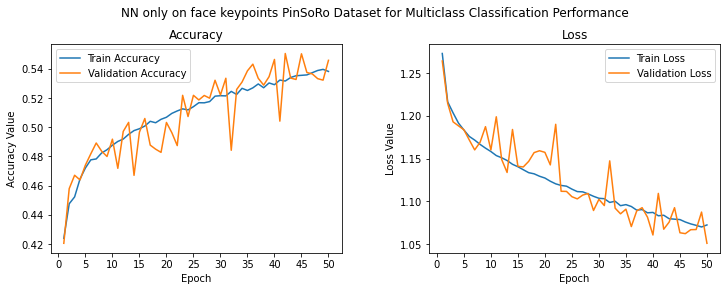

In [41]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Multiclass Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_pf.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_pf.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_pf.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_pf.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [42]:
pred_ypf = np.argmax(model_pf.predict(Xpf_test), axis = 1)

In [43]:
true_ypf = np.argmax(ypf_test, axis = 1)

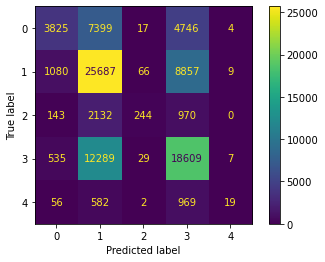

In [44]:
disp7 = ConfusionMatrixDisplay(confusion_matrix(true_ypf, pred_ypf))
disp7.plot()

# Transfer learning for Qamqor - only face


In [45]:
model_temp2 = model_pf

In [46]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_temp2.layers[:-1]:
    layer.trainable = False


In [47]:
model_tl_pf = Sequential(
    [
    model_temp2,
    layers.Dense(1, activation = 'sigmoid'),
    
    ]
)
model_tl_pf.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])


In [48]:
#Training for qamqor with transfer learning - method 2
history_tl_pf = model_tl_pf.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 3ms/step - loss: 0.5901 - accuracy: 0.7268 - val_loss: 0.5857 - val_accuracy: 0.7278
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7282 - val_loss: 0.5834 - val_accuracy: 0.7282
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7289 - val_loss: 0.5820 - val_accuracy: 0.7292
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7296 - val_loss: 0.5812 - val_accuracy: 0.7294
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7298 - val_loss: 0.5807 - val_accuracy: 0.7295
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7299 - val_loss: 0.5795 - val_accuracy: 0.7299
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7304 - val_loss: 0.5797 - val_accuracy: 0.7302
Epoch 8/15
78/78 [==

In [49]:
pred_ytl_pf = np.round(model_tl_pf.predict(Xqf_test))

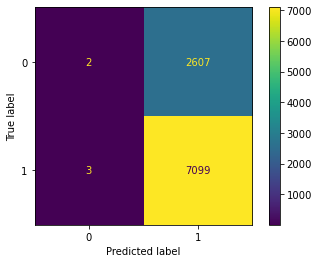

In [50]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_ytl_pf))
disp8.plot()

# Model for Pinsoro if binary classification is used - face only


In [51]:
#Features and labels
X_f = np.array(pinsoro2[pinsoro2.columns[0:139]])
y_f = pinsoro2['purple_child_social_engagement']

In [52]:
#Split to train, validation, and test sets in ratio 80:10:10
Xf_train, Xf_rem, yf_train, yf_rem = train_test_split(X_f, y_f, train_size=0.8, random_state=123, stratify=y_f)
Xf_valid, Xf_test, yf_valid, yf_test = train_test_split(Xf_rem,yf_rem, test_size=0.5, random_state=123, stratify=yf_rem)

In [53]:
#Neural network model
model_f = Sequential(
    [
    layers.Dense(256, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
    ])
model_f.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [54]:
#training
history_f = model_f.fit(Xf_train, yf_train, validation_data=(Xf_valid, yf_valid), batch_size = 10000, epochs = 50, verbose = 1)

Epoch 1/50
58/58 [==============================] - 2s 25ms/step - loss: 0.6797 - accuracy: 0.5682 - val_loss: 0.6653 - val_accuracy: 0.5829
Epoch 2/50
58/58 [==============================] - 1s 26ms/step - loss: 0.6628 - accuracy: 0.5874 - val_loss: 0.6562 - val_accuracy: 0.6061
Epoch 3/50
58/58 [==============================] - 1s 24ms/step - loss: 0.6572 - accuracy: 0.6007 - val_loss: 0.6531 - val_accuracy: 0.6107
Epoch 4/50
58/58 [==============================] - 1s 24ms/step - loss: 0.6552 - accuracy: 0.6063 - val_loss: 0.6491 - val_accuracy: 0.6119
Epoch 5/50
58/58 [==============================] - 1s 23ms/step - loss: 0.6497 - accuracy: 0.6115 - val_loss: 0.6451 - val_accuracy: 0.6174
Epoch 6/50
58/58 [==============================] - 1s 22ms/step - loss: 0.6479 - accuracy: 0.6145 - val_loss: 0.6602 - val_accuracy: 0.6049
Epoch 7/50
58/58 [==============================] - 1s 24ms/step - loss: 0.6462 - accuracy: 0.6165 - val_loss: 0.6420 - val_accuracy: 0.6223
Epoch 8/50
58

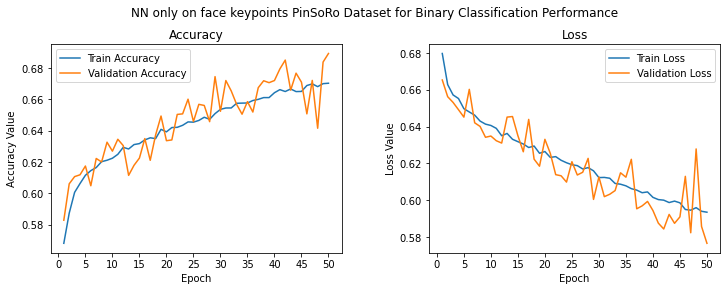

In [58]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('NN only on face keypoints PinSoRo Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 51))
ax1.plot(epoch_list, history_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [59]:
scores_f = model_f.evaluate(Xf_test, yf_test, verbose = 1)

2259/2259 [==============================] - 1s 501us/step - loss: 0.5778 - accuracy: 0.6900


In [60]:
pred_f = np.round(model_f.predict(Xf_test))

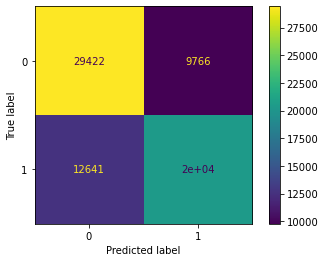

In [61]:
disp8 = ConfusionMatrixDisplay(confusion_matrix(yf_test, pred_f))
disp8.plot()

# Transfer learning for Pinsoro with binary classification - face only

In [62]:
model_tl_fbin = model_f

In [63]:
#Freeze all layers of pinsoro model except the last one so that they are not trained
for layer in model_tl_fbin.layers[:-1]:
    layer.trainable = False


In [64]:

model_tl_fbin.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(0.001), metrics=['accuracy'])

In [65]:
#Training for qamqor with transfer learning
history_tl_f = model_tl_fbin.fit(Xqf_train, yqf_train, validation_data=(Xqf_valid, yqf_valid), batch_size = 1000, epochs = 15, verbose = 1)

Epoch 1/15
78/78 [==============================] - 1s 3ms/step - loss: 235.3327 - accuracy: 0.4642 - val_loss: 176.9223 - val_accuracy: 0.5045
Epoch 2/15
78/78 [==============================] - 0s 2ms/step - loss: 152.1885 - accuracy: 0.5348 - val_loss: 138.7988 - val_accuracy: 0.5517
Epoch 3/15
78/78 [==============================] - 0s 2ms/step - loss: 121.4290 - accuracy: 0.5816 - val_loss: 113.1946 - val_accuracy: 0.5951
Epoch 4/15
78/78 [==============================] - 0s 2ms/step - loss: 98.5867 - accuracy: 0.6054 - val_loss: 91.3830 - val_accuracy: 0.6119
Epoch 5/15
78/78 [==============================] - 0s 2ms/step - loss: 78.4272 - accuracy: 0.6226 - val_loss: 72.1299 - val_accuracy: 0.6260
Epoch 6/15
78/78 [==============================] - 0s 2ms/step - loss: 60.3337 - accuracy: 0.6355 - val_loss: 55.4296 - val_accuracy: 0.6381
Epoch 7/15
78/78 [==============================] - 0s 2ms/step - loss: 45.2884 - accuracy: 0.6473 - val_loss: 41.3991 - val_accuracy: 0.6488


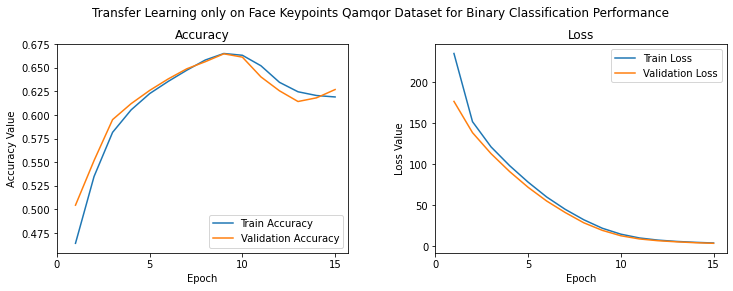

In [68]:
#Graph to test for overfitting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Transfer Learning only on Face Keypoints Qamqor Dataset for Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1, 16))
ax1.plot(epoch_list, history_tl_f.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_tl_f.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_tl_f.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history_tl_f.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [67]:
scores_tl_f = model_tl_fbin.evaluate(Xqf_test, yqf_test, verbose = 1)

304/304 [==============================] - 0s 530us/step - loss: 3.9093 - accuracy: 0.6226


In [70]:
pred_tl_f = np.round(model_tl_fbin.predict(Xqf_test))

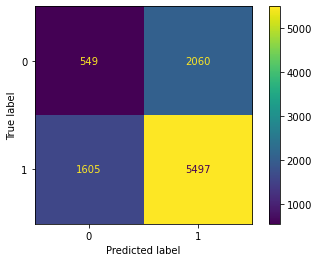

In [71]:
disp10 = ConfusionMatrixDisplay(confusion_matrix(yqf_test, pred_tl_f))
disp10.plot()